<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [3]:
#Importation du fichier population.csv
population = pd.read_csv('DAN-P4-FAO/population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alim = pd.read_csv('DAN-P4-FAO/dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_ali = pd.read_csv('DAN-P4-FAO/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nut = pd.read_csv('DAN-P4-FAO/sous_nutrition.csv')


In [4]:
dispo_alim

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
aide_ali

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [6]:
sous_nut

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [7]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [8]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))
#La nature des données dans chacune des colonnes
display("La nature des données dans chacune des colonnes est :",population.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
display("Le nombre de valeurs présentes dans chacune des colonnes :",population.count())

# population.info()

Le tableau comporte 3 colonne(s)


'La nature des données dans chacune des colonnes est :'

Zone       object
Année       int64
Valeur    float64
dtype: object

'Le nombre de valeurs présentes dans chacune des colonnes :'

Zone      1416
Année     1416
Valeur    1416
dtype: int64

In [9]:
#Affichage les 5 premières lignes de la table

population.head(5)


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [10]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * (1000)
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [11]:

#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur':'Population'}, inplace=True)


In [12]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head(5)

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [13]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alim.shape[0]))

print("Le tableau comporte {} colonne(s)".format(dispo_alim.shape[1]))


Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [14]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(dispo_alim.shape[1]))

Le tableau comporte 18 colonne(s)


In [15]:
#Affichage les 5 premières lignes de la table
dispo_alim.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [16]:
#remplacement des NaN dans le dataset par des 0
dispo_alim.fillna(0, inplace=True)

In [17]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
a_convertir = ['Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement']
for c in a_convertir:
    dispo_alim[c] = dispo_alim[c] * 1000000

In [18]:
#Affichage les 5 premières lignes de la table
dispo_alim.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [19]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_ali.shape[0]))

Le tableau comporte 1475 observation(s) ou article(s)


In [20]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(aide_ali.shape[1]))

Le tableau comporte 4 colonne(s)


In [21]:
#Affichage les 5 premières lignes de la table
aide_ali.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [22]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_ali.rename(columns={"Pays bénéficiaire": "Zone"}, inplace=True)
aide_ali.head(4)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160


In [23]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_ali['Valeur'] = aide_ali['Valeur'] * (1000)

In [24]:
#Affichage les 5 premières lignes de la table
aide_ali.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [25]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nut.shape[0]))

Le tableau comporte 1218 observation(s) ou article(s)


In [26]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(sous_nut.shape[1]))

Le tableau comporte 3 colonne(s)


In [27]:
#Afficher les 5 premières lignes de la table
sous_nut.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [28]:
#Conversion de la colonne sous nutrition en numérique
sous_nut['Valeur'] = pd.to_numeric(sous_nut['Valeur'] , errors='coerce')
sous_nut.head(3)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9


In [29]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nut['Valeur'] = pd.to_numeric(sous_nut['Valeur'] , errors='coerce')
#Puis remplacement des NaN en 0
sous_nut['Valeur'].fillna(0, inplace=True)

In [30]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nut.rename(columns={"Valeur": "sous_nutrition"}, inplace=True)
sous_nut.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [31]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nut['sous_nutrition'] = sous_nut['sous_nutrition'] * (1000000)

In [32]:
# Correction du format de la colonne "Année" de la table Sous nutrition
sous_nut['Année']=sous_nut['Année'].apply(lambda x: int(x.split('-')[0])+1)

In [33]:
#Afficher les 5 premières lignes de la table
sous_nut.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [34]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
sous_nut_2017 = sous_nut[sous_nut["Année"] == 2017][["Zone", "sous_nutrition"]]
population_2017 = population[population["Année"] == 2017]
# jointure
colonne_jointure = 'Zone'
pop_sous_nutri_2017 = pd.merge(population_2017, sous_nut_2017, how='inner', on=colonne_jointure)
# Filtrer les données pour garder seulement l'année 2017

In [35]:
#Affichage du dataset
pop_sous_nutri_2017.head()

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [36]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
pers_en_sous_nutrition = pop_sous_nutri_2017['sous_nutrition'].sum()
# Afficher le nombre total de personnes en état de sous-nutrition
print('Nombre total de personnes en état de sous-nutrition :' , pers_en_sous_nutrition.sum())
# La proportion de personnes en état de nutrition
proport_pers = round(pop_sous_nutri_2017['sous_nutrition'].sum() / pop_sous_nutri_2017['Population'].sum() * 100,2)
print(f'La proportion de personnes en état de nutrition:{proport_pers}%')

Nombre total de personnes en état de sous-nutrition : 535700000.0
La proportion de personnes en état de nutrition:7.1%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [37]:
#Combien mange en moyenne un être humain ? Source => 


In [38]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
pop_dispoalim = pd.merge(dispo_alim, population_2017, on='Zone', how='inner')

In [39]:
#Affichage du nouveau dataframe
pop_dispoalim.head(3)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0


In [40]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
pop_dispoalim['dispo_kcal'] = (pop_dispoalim['Disponibilité alimentaire (Kcal/personne/jour)'] * pop_dispoalim['Population']) * 365
print("Calcul kcal disponibles mondialement est kal=", pop_dispoalim['dispo_kcal'].sum())

Calcul kcal disponibles mondialement est kal= 7635429388975815.0


In [41]:
#Calcul du nombre d'humains pouvant être nourris
humains_nourris=pop_dispoalim['dispo_kcal'].sum ()/(2250 *365)
# Calcul de la proportion de la population mondiale pouvant être nourrie
proportion_nourrie = humains_nourris/ pop_dispoalim['Population'].sum() * 100
print(f"Le nombre d'humains pouvant être nourris est : {humains_nourris}")
print(f"La proportion de la population mondiale pouvant être nourrie est : {proportion_nourrie:.2%}")

Le nombre d'humains pouvant être nourris est : 9297326501.036
La proportion de la population mondiale pouvant être nourrie est : 135.58%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [42]:
#Transfert des données avec les végétaux dans un nouveau dataframe
donnees_veget = pop_dispoalim[pop_dispoalim["Origine"] == "vegetale"]

In [43]:
#Calcul du nombre de kcal disponible pour les végétaux
#donnees_veget['dispo_kcali']=donnees_veget['Disponibilité alimentaire (Kcal/personne/jour)'] / donnees_veget['Population']
donn_vesgtkcal=donnees_veget['dispo_kcal'].sum()
print("Le nombre de kcal disponible pour les végétaux est de :",donn_vesgtkcal)

Le nombre de kcal disponible pour les végétaux est de : 6300178937197865.0


In [44]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
humains_nourris_veg=donn_vesgtkcal / (2250 * 365)
print(f"Le nombre humains pouvant être nourris avec les vegetaux est : {humains_nourris_veg}")
# Calcul de la proportion de la population mondiale pouvant être nourrie avec les végétaux
proportion_nourrie_vegetaux = humains_nourris_veg / donnees_veget['Population'].sum()* 100
print(f"La proportion de la population mondiale pouvant être nourrie avec les végétaux est : {proportion_nourrie_vegetaux: .2%}")

Le nombre humains pouvant être nourris avec les vegetaux est : 7671450760.667111
La proportion de la population mondiale pouvant être nourrie avec les végétaux est :  145.50%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [45]:
#Calcul de la disponibilité totale
dispo_inter_totale = pop_dispoalim['Disponibilité intérieure'].sum()
print(f"La disponibilité totale interieure est de : {dispo_inter_totale} kcal")

La disponibilité totale interieure est de : 9733927000000.0 kcal


In [46]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,Autres Utilisations,Semences,Traitement
colonnes = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Autres Utilisations', 'Semences', 'Traitement']
for colonne in colonnes:
    print(f" La proportion de {colonne} est de {round(pop_dispoalim[colonne].sum()/ dispo_inter_totale *100,2)}%") 
# Ajoute une ligne vide entre chaque colonne

 La proportion de Aliments pour animaux est de 13.23%
 La proportion de Pertes est de 4.65%
 La proportion de Nourriture est de 49.37%
 La proportion de Autres Utilisations est de 8.82%
 La proportion de Semences est de 1.58%
 La proportion de Traitement est de 22.45%


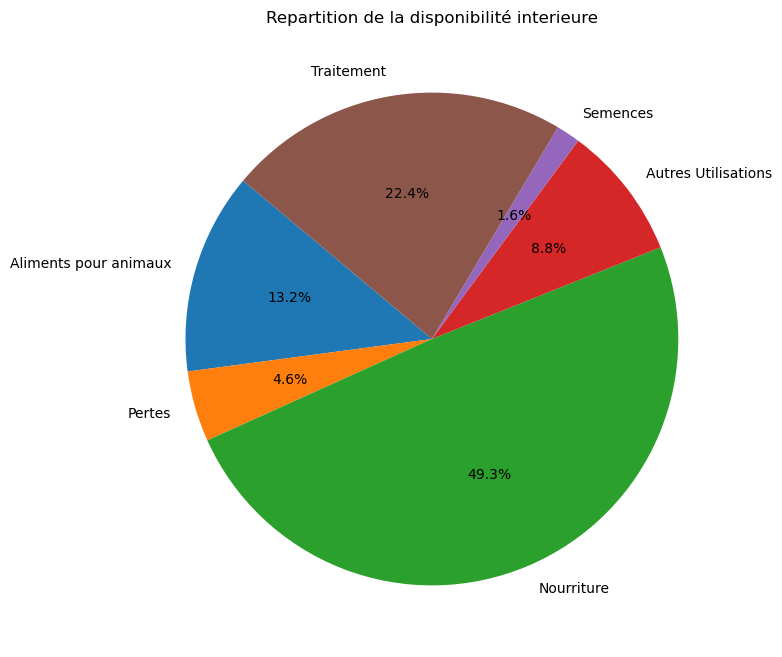

In [47]:
import matplotlib.pyplot as plt
#Definition des proportions
proportion_aliments_animaux=pop_dispoalim['Aliments pour animaux'].sum()/dispo_inter_totale *100
proportion_pertes=pop_dispoalim['Pertes'].sum()/ dispo_inter_totale *100
proportion_nourriture=pop_dispoalim['Nourriture'].sum()/ dispo_inter_totale *100
proportion_autes_utilisation=pop_dispoalim['Autres Utilisations'].sum()/ dispo_inter_totale *100
proportion_semences=pop_dispoalim['Semences'].sum()/ dispo_inter_totale *100
proportion_traitement=pop_dispoalim['Traitement'].sum()/ dispo_inter_totale *100

#Definition des labels
labels=["Aliments pour animaux","Pertes","Nourriture","Autres Utilisations","Semences","Traitement"]

#Création d'une liste proportions
Proportions= [proportion_aliments_animaux,proportion_pertes,proportion_nourriture,proportion_autes_utilisation,proportion_semences,proportion_traitement]

# Création du camembert pour visualiser les proportions
plt.figure(figsize=(8, 8))
plt.pie(Proportions, labels=labels, autopct='%1.1f%%', startangle=140)

# Ajout d'un titre
plt.title('Repartition de la disponibilité interieure')

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [48]:
#Création d'une liste avec toutes les variables
# Obtention de la liste des colonnes
liste_variables = aide_ali['Produit'].unique().tolist()
# Affichage de la liste des variables
print(liste_variables)

['Autres non-céréales', 'Blé et Farin', 'Céréales', 'Fruits secs, total', 'Huiles végétales', 'Légumineuses Sèches,Tot.', 'Non-céréales', 'Riz, total', 'Sucre, total', 'Céréales Secondaires', 'Lait, total', 'Mélanges et préparations', 'Poiss&produi', 'BulgurFarEnt', 'Viande Total', 'Graisses Com']


In [49]:
liste_céréales = ['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge','Riz (Eq Blanchi)','Avoine','Seigle','Sorgho']

In [50]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
df_céreale=pop_dispoalim.loc[pop_dispoalim['Produit'].isin(liste_céréales)]

In [51]:
#Affichage de la proportion d'alimentation animale
proportion_alim_animale = round(df_céreale['Aliments pour animaux'].sum() / df_céreale['Disponibilité intérieure'].sum()*100, 2)
# Affichage de la proportion
print(f"La proportion alimentation animale par rapport à la disponibilité totale de nourriture est : {proportion_alim_animale}%")

La proportion alimentation animale par rapport à la disponibilité totale de nourriture est : 36.14%


In [52]:
#Affichage de la proportion d'alimentation humaine
proportion_alim_humaine = round(df_céreale['Nourriture'].sum() / df_céreale['Disponibilité intérieure'].sum()*100, 2)
# Affichage de la proportion
print(f"La proportion alimentation humaine par rapport à la disponibilité totale de nourriture est : {proportion_alim_humaine}%")

La proportion alimentation humaine par rapport à la disponibilité totale de nourriture est : 42.91%


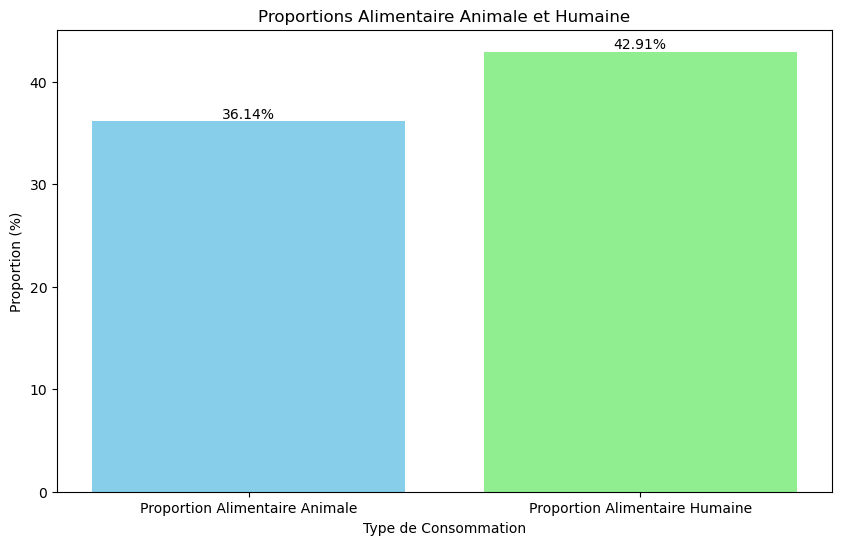

In [53]:
import matplotlib.pyplot as plt
# Définition des proportions
proportion_alim_animale = 36.14  # 36.14%
proportion_alim_humaine = 42.91  # 42.91%

# Labels et proportions
labels = ['Proportion Alimentaire Animale', 'Proportion Alimentaire Humaine']
proportions = [proportion_alim_animale, proportion_alim_humaine]

# Création du diagramme à barres
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, proportions, color=['skyblue', 'lightgreen'])

# Ajout des pourcentages au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

# Ajout d'un titre et des labels des axes
plt.title('Proportions Alimentaire Animale et Humaine')
plt.xlabel('Type de Consommation')
plt.ylabel('Proportion (%)')

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [54]:
#Création de la colonne proportion par pays
pop_sous_nutri_2017['proportion']=pop_sous_nutri_2017['sous_nutrition'] / pop_sous_nutri_2017['Population']
# Filtrage des données pour l'année 2017
pop_sous_nutri_2017
# Trouver le pays avec la proportion de personnes sous-alimentées la plus élevée en 2017
pop_sous_nutri_2017[['Zone', 'sous_nutrition', 'proportion']].sort_values(by='proportion', ascending=False).head(10).reset_index()

,index,Zone,sous_nutrition,proportion
0,78,Haïti,5300000.0,0.482592
1,157,République populaire démocratique de Corée,12000000.0,0.471887
2,108,Madagascar,10500000.0,0.410629
3,103,Libéria,1800000.0,0.382797
4,100,Lesotho,800000.0,0.382494
5,183,Tchad,5700000.0,0.379576
6,161,Rwanda,4200000.0,0.350556
7,121,Mozambique,9400000.0,0.328109
8,186,Timor-Leste,400000.0,0.321735
9,0,Afghanistan,10500000.0,0.289287


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [55]:
#calcul du total de l'aide alimentaire par pays
aide_par_pays=aide_ali[["Zone", "Valeur"]].groupby(["Zone"]).sum()

In [56]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_par_pays.sort_values(by="Valeur", ascending=False).head(10)

,Valeur
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [57]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
# les données pour les années 2013 à 2016
df_filtre_2013_2016 = aide_ali[(aide_ali['Année'] >= 2013) & (aide_ali['Année'] <= 2016)]
# Créer un DataFrame avec les colonnes "zone", "année" et "aide_alimentaire"
df_aide_ali_2013_2016 = df_filtre_2013_2016[['Zone', 'Année', 'Valeur']]

# Groupby sur zone et année et calculer la somme de l'aide alimentaire
df_groupe_aide_ali = df_aide_ali_2013_2016.groupby(['Zone', 'Année']).sum()

In [58]:
#Création d'une liste contenant les 10 pays qui ont le plus bénéficiées de l'aide alimentaire
pays_qui_ont_beneficier_le_plus_daide_alim = df_groupe_aide_ali.groupby(['Zone']).sum(['Valeur'])
liste_5_pays = pays_qui_ont_beneficier_le_plus_daide_alim.sort_values(by='Valeur', ascending=False).reset_index().head(5)
liste_10_pays = pays_qui_ont_beneficier_le_plus_daide_alim.sort_values(by='Valeur', ascending=False).reset_index().head(10)

In [59]:
#Les 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016
evolution_top_05=aide_ali[aide_ali['Zone'].isin(liste_5_pays['Zone'])][['Zone', 'Année', 'Valeur']].groupby(['Zone', 'Année']).sum()
evolution_top_05

Valeur
Zone                      Année           
République arabe syrienne 2013   563566000
                          2014   651870000
                          2015   524949000
                          2016   118558000
Soudan                    2013   330230000
                          2014   321904000
                          2015    17650000
Soudan du Sud             2013   196330000
                          2014   450610000
                          2015    48308000
Yémen                     2013   264764000
                          2014   103840000
                          2015   372306000
                          2016   465574000
Éthiopie                  2013   591404000
                          2014   586624000
                          2015   203266000

In [60]:
#On filtre sur le dataframe avec notre liste
liste_10_pays

,Zone,Valeur
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000


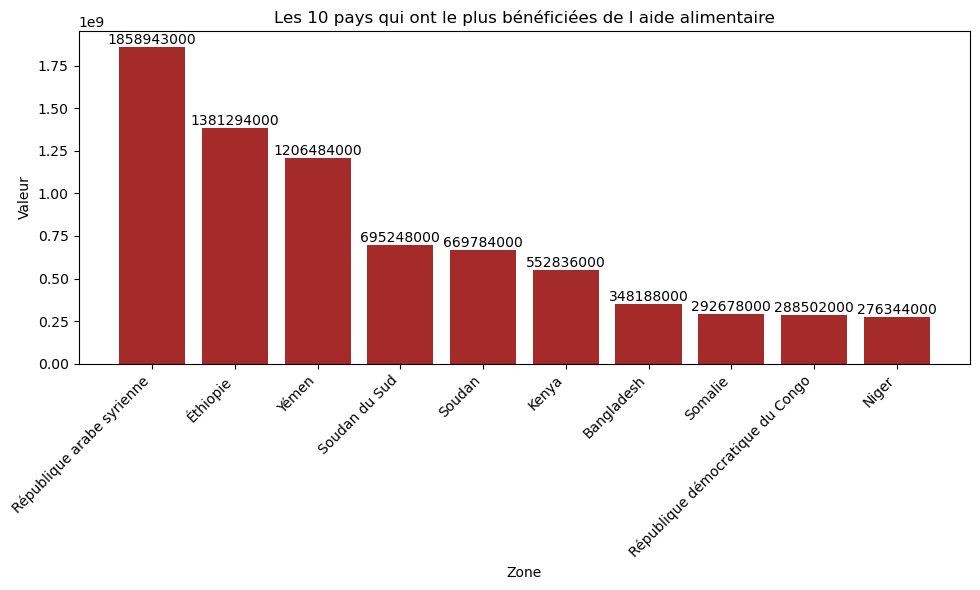

In [61]:
plt.figure(figsize=(10, 6))  # Définir la taille du graphique
plt.bar(liste_10_pays['Zone'], liste_10_pays['Valeur'], color='brown')  # Créer le diagramme à barres
plt.xlabel('Zone')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Valeur')  # Ajouter une étiquette à l'axe des y
plt.title('Les 10 pays qui ont le plus bénéficiées de l aide alimentaire')  # Ajouter un titre au graphique
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la mise en page pour éviter la superposition des étiquettes
# Ajouter les valeurs de proportion au-dessus de chaque barre
for i, proportion in enumerate(liste_10_pays['Valeur']):
    plt.text(i, proportion, str(proportion), ha='center', va='bottom')
plt.show()  # Afficher le graphique

In [62]:
# Affichage des pays avec l'aide alimentaire par année
display(df_groupe_aide_ali)

Valeur
Zone        Année           
Afghanistan 2013   128238000
            2014    57214000
Algérie     2013    35234000
            2014    18980000
            2015    17424000
...                      ...
Égypte      2013     1122000
Équateur    2013     1362000
Éthiopie    2013   591404000
            2014   586624000
            2015   203266000

[228 rows x 1 columns]

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [63]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_pays = dispo_alim[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()
pays_avec_le_moins_dispo=dispo_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)')
# Affichage du résultat
pays_avec_le_moins_dispo.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [64]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
pays_avec_plus_dispo=dispo_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
pays_avec_plus_dispo.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [65]:
#création d'un dataframe avec uniquement la Thaïlande
jointurethai=pd.merge(dispo_alim,sous_nut[sous_nut['Année']==2017], on='Zone', how='left')
df_thailande=jointurethai[jointurethai['Zone']== 'Thaïlande']
df_thailande.head(3)


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,sous_nutrition
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000000.0,5000000.0,33000000.0,75000000.0,0.0,45000000.0,0.0,0.0,0.0,2017.0,6200000.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000000.0,6000000.0,2000000.0,6000000.0,0.0,12000000.0,0.0,2000000.0,0.0,2017.0,6200000.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,0.00,0.00,358000000.0,110000000.0,21000000.0,0.0,0.0,447000000.0,0.0,0.0,0.0,2017.0,6200000.0


In [66]:
#Calcul de la sous nutrition en Thaïlande
sous_nutrition_thailande =df_thailande['sous_nutrition'].unique().sum().astype(int)
print("Le nombre de personne en état de sous nutrition en thaïlande est :", "{:,}".format(sous_nutrition_thailande))
proportion_thailande=sous_nutrition_thailande/pop_sous_nutri_2017['Population'].sum() * 100
print(f"La proportion de la Thailande est : {proportion_thailande: .2%}")

Le nombre de personne en état de sous nutrition en thaïlande est : 6,200,000
La proportion de la Thailande est :  8.22%


In [66]:
manioc_thailande = df_thailande[df_thailande['Produit']=='Manioc']
col_manioc=manioc_thailande[['Zone', 'Produit', 'Exportations - Quantité', 'Production', 'Disponibilité alimentaire (Kcal/personne/jour)']]
manioc_thailande_filtre=col_manioc
manioc_thailande_filtre

,Zone,Produit,Exportations - Quantité,Production,Disponibilité alimentaire (Kcal/personne/jour)
13620,Thaïlande,Manioc,2.521400e+10,3.022800e+10,40.0


In [67]:
# On calcule la proportion exportée en fonction de la proportion
export_manioc = manioc_thailande['Exportations - Quantité'].iloc[0] / manioc_thailande['Production'].iloc[0] * 100
print(f"La proportion de l'exportationde manioc est de : {round(export_manioc, 2)} %")

La proportion de l'exportationde manioc est de : 83.41 %


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

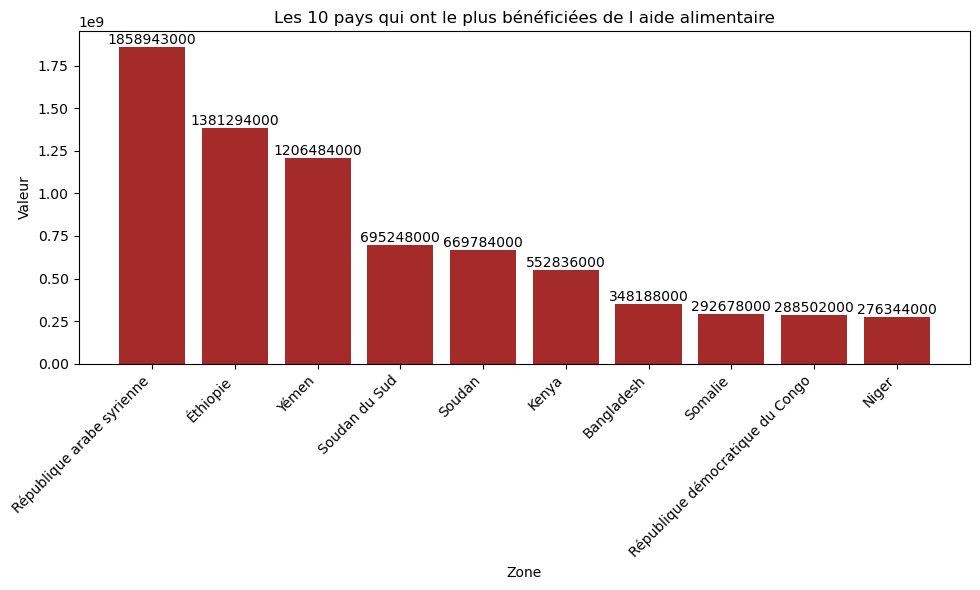

In [68]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"
plt.figure(figsize=(10, 6))  # Définir la taille du graphique
plt.bar(liste_10_pays['Zone'], liste_10_pays['Valeur'], color='brown')  # Créer le diagramme à barres
plt.xlabel('Zone')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Valeur')  # Ajouter une étiquette à l'axe des y
plt.title('Les 10 pays qui ont le plus bénéficiées de l aide alimentaire')  # Ajouter un titre au graphique
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la mise en page pour éviter la superposition des étiquettes
# Ajouter les valeurs de proportion au-dessus de chaque barre
for i, proportion in enumerate(liste_10_pays['Valeur']):
    plt.text(i, proportion, str(proportion), ha='center', va='bottom')
plt.show()  # Afficher le graphique